<a href="https://colab.research.google.com/github/Minc97/Praca-magisterska-backend/blob/master/Emotions_recogniction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization, ZeroPadding2D, Convolution2D, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from zipfile import ZipFile



In [2]:
!gdown 'https://drive.google.com/uc?id=17J5FbFqnkdzrTbMuEMrRUiJrvHB4BUZv' -O image_dataset.zip

!mkdir -p image_dataset

with ZipFile('image_dataset.zip', 'r') as zip:
    zip.extractall('image_dataset')

!rm image_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=17J5FbFqnkdzrTbMuEMrRUiJrvHB4BUZv
To: /content/image_dataset.zip
68.3MB [00:01, 67.3MB/s]


In [187]:
train_dir = "image_dataset/train" 
test_dir = "image_dataset/test"  
img_size = 48
num_classes = 7

In [189]:
train_datagen = ImageDataGenerator( #rotation_range = 120,
                                         width_shift_range = 0.2,
                                         height_shift_range = 0.2,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2,
                                         validation_split = 0.2
                                        )

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [190]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 128,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 128,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [191]:
model= tf.keras.models.Sequential()


model.add(Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(16,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(1600,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(400,activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64,activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(7, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [192]:
epochs = 60
batch_size = 64

In [193]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_257 (Conv2D)          (None, 48, 48, 8)         80        
_________________________________________________________________
conv2d_258 (Conv2D)          (None, 48, 48, 16)        1168      
_________________________________________________________________
batch_normalization_78 (Batc (None, 48, 48, 16)        64        
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_259 (Conv2D)          (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_79 (Batc (None, 24, 24, 32)      

In [194]:
history = model.fit(x = train_generator,epochs = epochs, validation_data = validation_generator)

Epoch 1/60
180/180 [==============================] - 17s 86ms/step - loss: 3.0229 - accuracy: 0.2236 - val_loss: 2.9741 - val_accuracy: 0.2472
Epoch 2/60
180/180 [==============================] - 15s 85ms/step - loss: 2.8815 - accuracy: 0.2508 - val_loss: 2.8926 - val_accuracy: 0.2479
Epoch 3/60
180/180 [==============================] - 15s 84ms/step - loss: 2.7894 - accuracy: 0.2562 - val_loss: 2.7640 - val_accuracy: 0.2493
Epoch 4/60
180/180 [==============================] - 15s 84ms/step - loss: 2.6951 - accuracy: 0.2562 - val_loss: 2.6286 - val_accuracy: 0.2584
Epoch 5/60
180/180 [==============================] - 15s 85ms/step - loss: 2.6110 - accuracy: 0.2656 - val_loss: 2.5473 - val_accuracy: 0.2661
Epoch 6/60
180/180 [==============================] - 15s 83ms/step - loss: 2.5292 - accuracy: 0.2702 - val_loss: 2.4531 - val_accuracy: 0.2800
Epoch 7/60
180/180 [==============================] - 15s 83ms/step - loss: 2.4575 - accuracy: 0.2678 - val_loss: 2.3791 - val_accuracy:

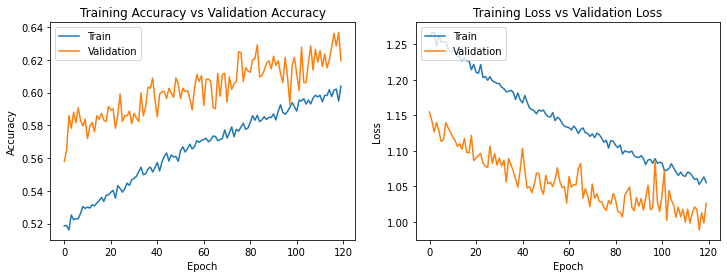

In [94]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [107]:
model.save('model_optimal.h5')

(48, 48)


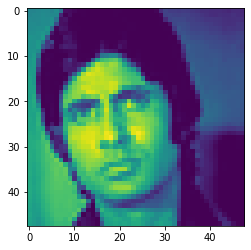

In [159]:
img = image.load_img("image_dataset/test/angry/im87.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [160]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [161]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[3.0677162e-07, 0.0, 0.99999964, 3.9374864e-18, 0.0, 0.0, 1.0565073e-32]


In [162]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Fear


In [163]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

12/12 [==============================] - 0s 31ms/step - loss: 1.0263 - accuracy: 0.6194
final train accuracy = 64.94 , validation accuracy = 61.94


In [164]:
model.save_weights('model_weights.h5')